In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

In [75]:
data = pd.read_excel('housing-dataset.xlsx')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [77]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  int64  
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

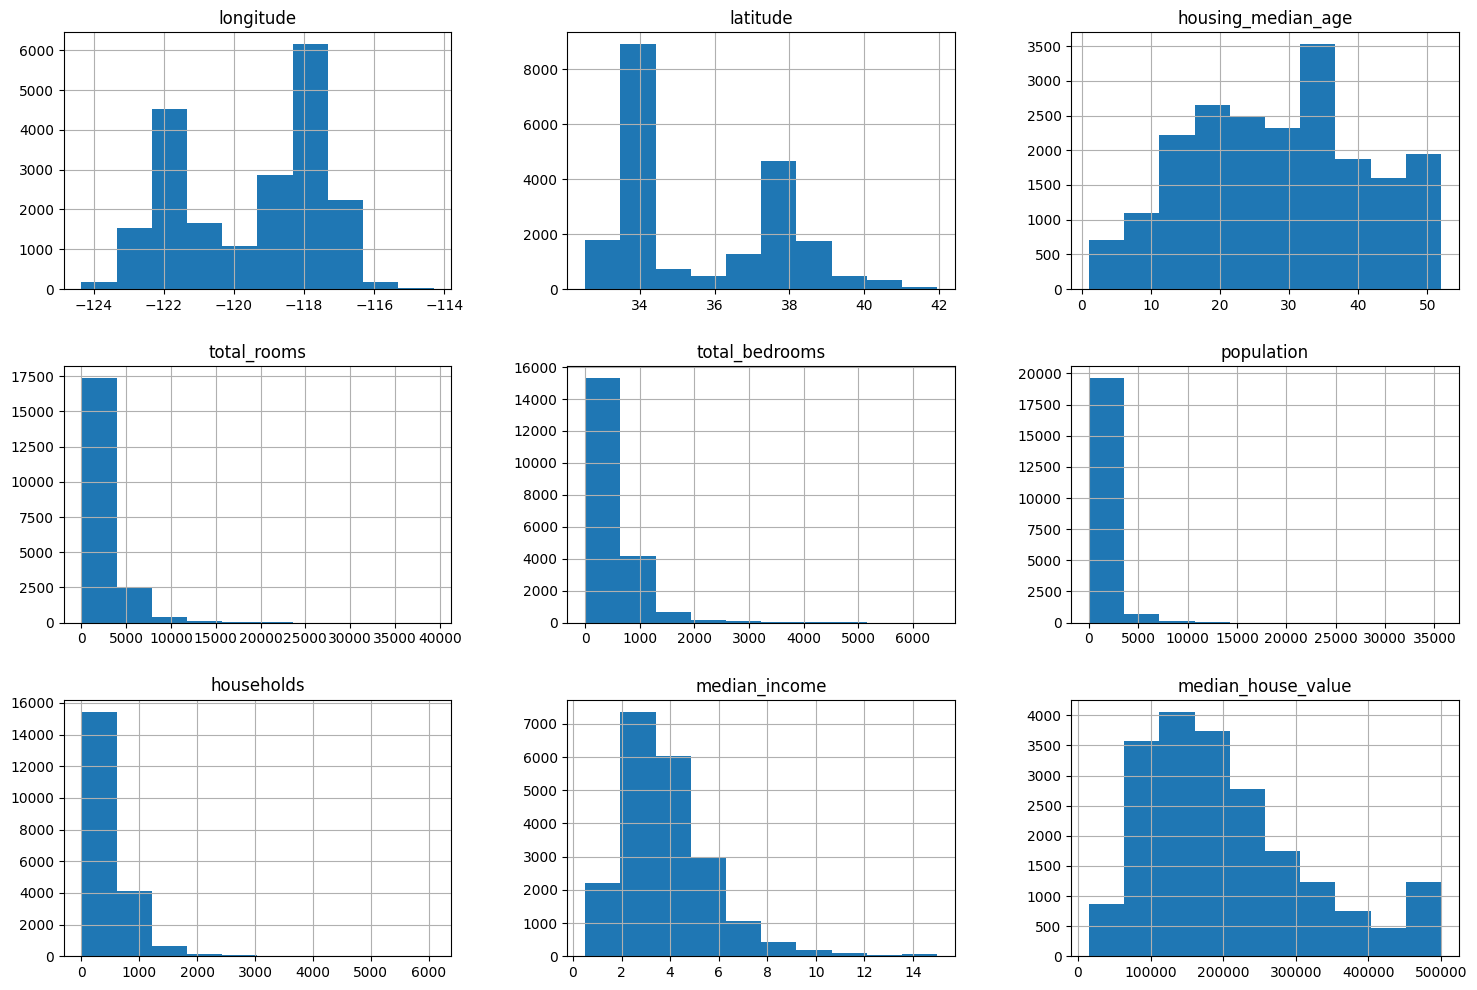

In [78]:
data.hist(figsize=(18,12))

In [79]:
data['total_rooms'] = np.log(data['total_rooms'] +1 )
data['total_bedrooms'] = np.log(data['total_bedrooms'] + 1)
data['households'] = np.log(data['households'] +1 )
data['population'] = np.log(data['population'] +1 )


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

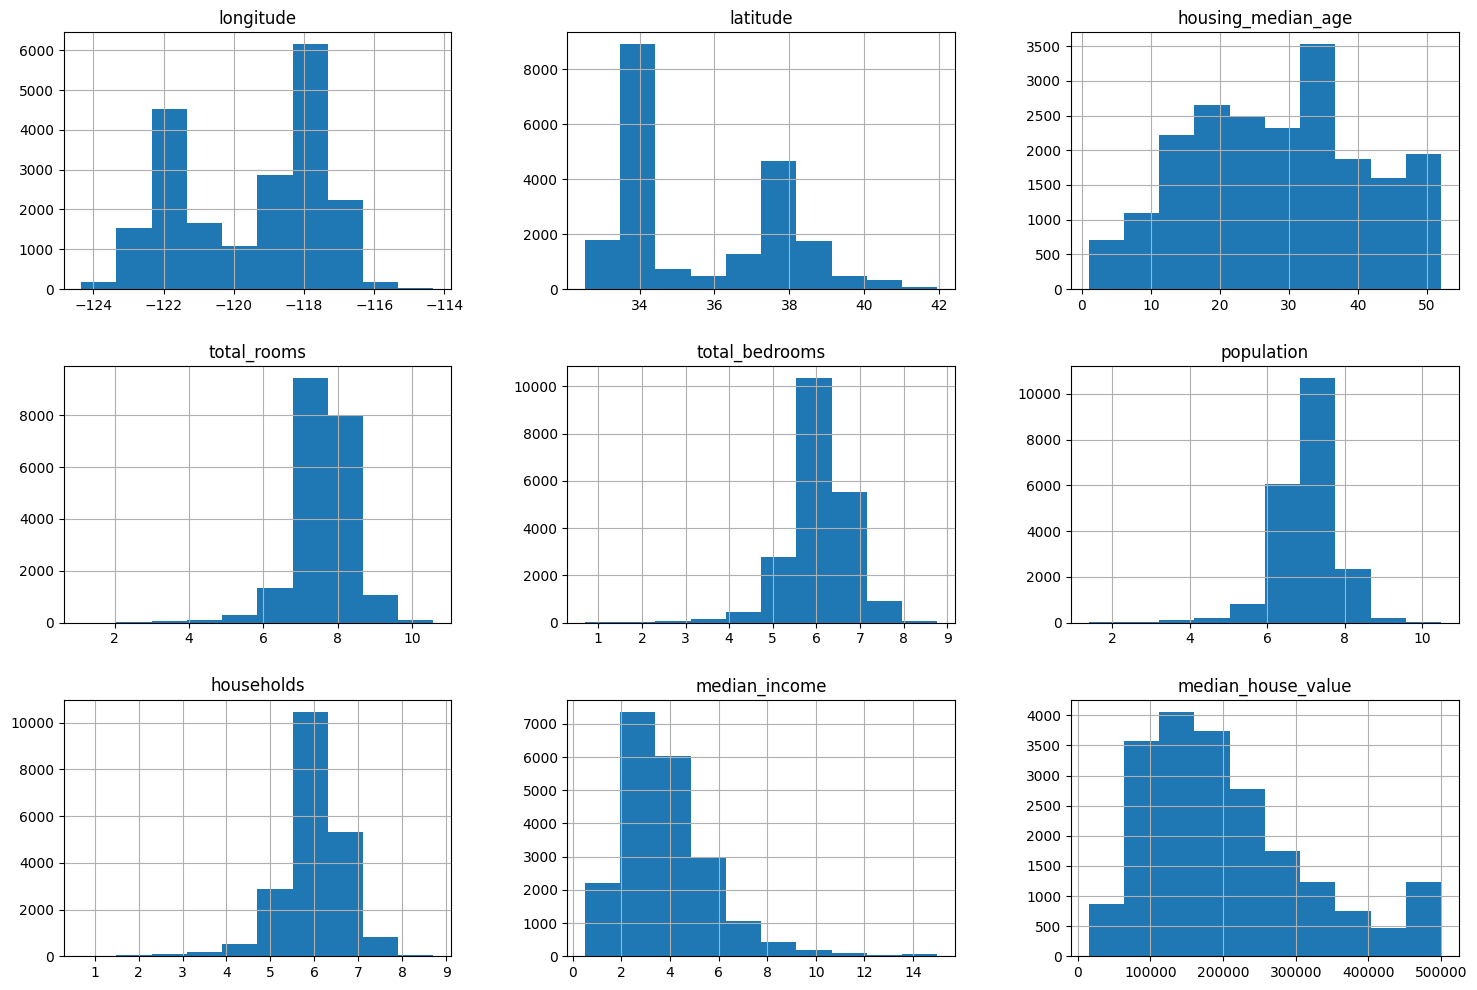

In [80]:
data.hist(figsize=(18,12))

In [81]:
data = data.join(pd.get_dummies(data.ocean_proximity)).drop(['ocean_proximity'], axis=1)


In [82]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.029967,0.060817,0.109259,0.055823,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.032552,-0.068248,-0.136543,-0.088207,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.313918,-0.272112,-0.243011,-0.241630,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.029967,-0.032552,-0.313918,1.000000,0.945865,0.864580,0.931700,0.205800,0.158506,0.020809,-0.012862,-0.007567,-0.016499,0.002862
total_bedrooms,0.060817,-0.068248,-0.272112,0.945865,1.000000,0.897523,0.974593,-0.025575,0.053311,0.041725,-0.044914,-0.001902,-0.016793,0.016429
population,0.109259,-0.136543,-0.243011,0.864580,0.897523,1.000000,0.932190,-0.004850,-0.021904,0.115020,-0.071775,-0.012866,-0.059377,-0.014457
households,0.055823,-0.088207,-0.241630,0.931700,0.974593,0.932190,1.000000,0.003918,0.072765,0.072391,-0.087137,-0.009222,-0.005827,0.019715
median_income,-0.015550,-0.079626,-0.118278,0.205800,-0.025575,-0.004850,0.003918,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.158506,0.053311,-0.021904,0.072765,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
<1H OCEAN,0.320831,-0.446928,0.045553,0.020809,0.041725,0.115020,0.072391,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


<Axes: >

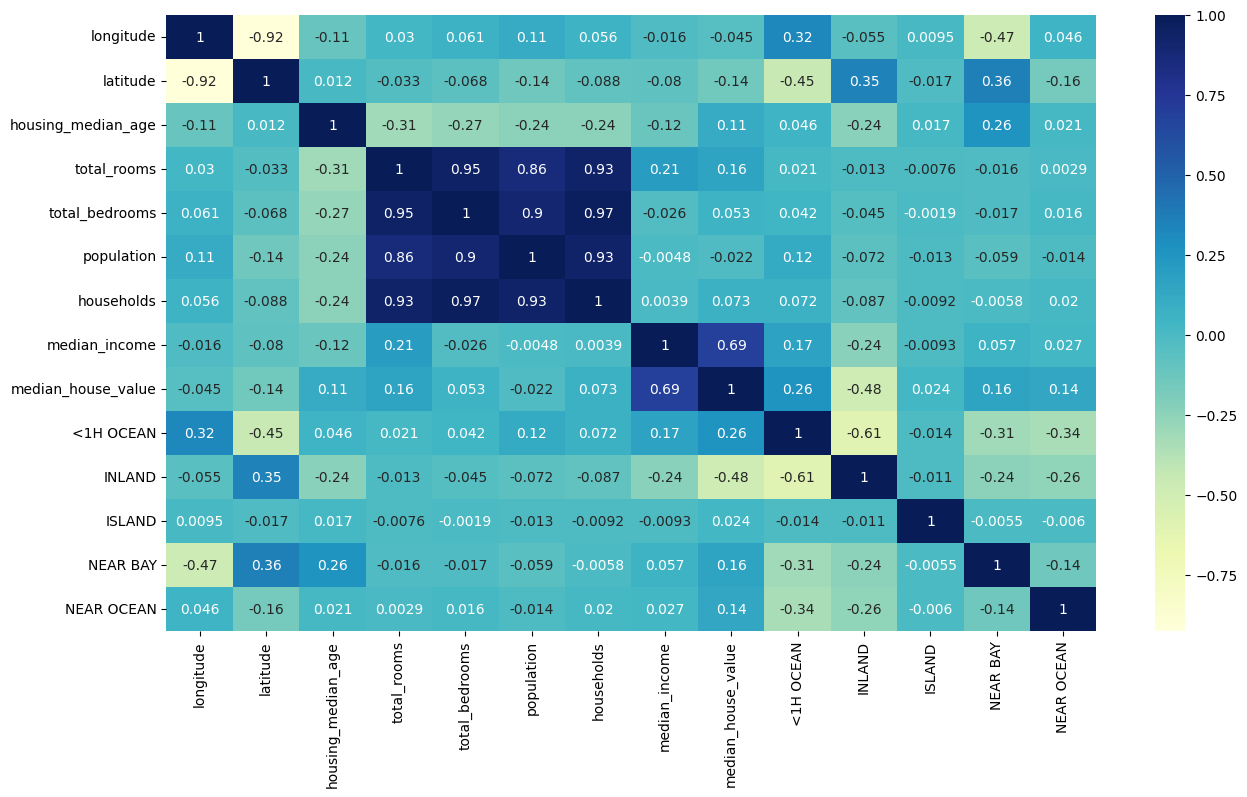

In [83]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot= True, cmap= "YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

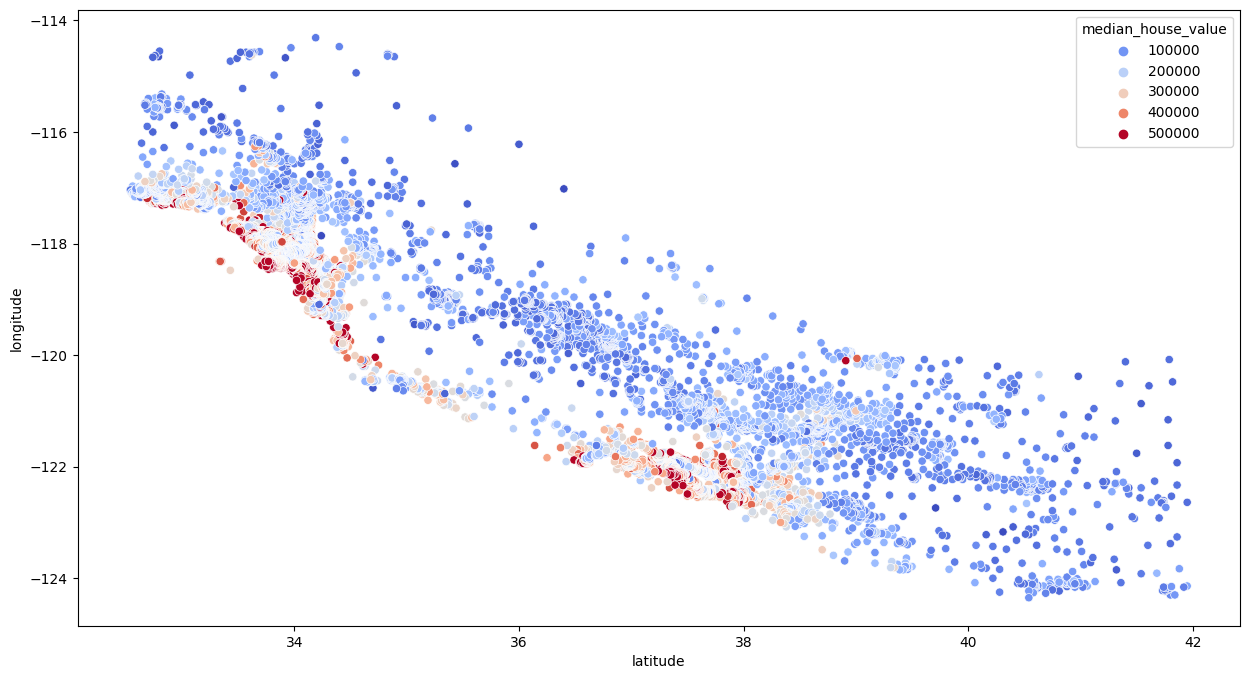

In [84]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y = "longitude", data = data, hue = "median_house_value", palette = "coolwarm")


In [85]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.029967,0.060817,0.109259,0.055823,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.032552,-0.068248,-0.136543,-0.088207,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.313918,-0.272112,-0.243011,-0.241630,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.029967,-0.032552,-0.313918,1.000000,0.945865,0.864580,0.931700,0.205800,0.158506,0.020809,-0.012862,-0.007567,-0.016499,0.002862
total_bedrooms,0.060817,-0.068248,-0.272112,0.945865,1.000000,0.897523,0.974593,-0.025575,0.053311,0.041725,-0.044914,-0.001902,-0.016793,0.016429
population,0.109259,-0.136543,-0.243011,0.864580,0.897523,1.000000,0.932190,-0.004850,-0.021904,0.115020,-0.071775,-0.012866,-0.059377,-0.014457
households,0.055823,-0.088207,-0.241630,0.931700,0.974593,0.932190,1.000000,0.003918,0.072765,0.072391,-0.087137,-0.009222,-0.005827,0.019715
median_income,-0.015550,-0.079626,-0.118278,0.205800,-0.025575,-0.004850,0.003918,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.158506,0.053311,-0.021904,0.072765,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
<1H OCEAN,0.320831,-0.446928,0.045553,0.020809,0.041725,0.115020,0.072391,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


In [86]:
data['bedroom_ratio'] = data['total_bedrooms'] / data['total_rooms']
data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio
0,-122.23,37.88,41,6.781058,4.867534,5.777652,4.844187,8.3252,452600,False,False,False,True,False,0.717813
1,-122.22,37.86,21,8.867850,7.009409,7.784057,7.037906,8.3014,358500,False,False,False,True,False,0.790429
2,-122.24,37.85,52,7.291656,5.252273,6.208590,5.181784,7.2574,352100,False,False,False,True,False,0.720313
3,-122.25,37.85,52,7.150701,5.463832,6.326149,5.393628,5.6431,341300,False,False,False,True,False,0.764097
4,-122.25,37.85,52,7.395108,5.638355,6.338594,5.560682,3.8462,342200,False,False,False,True,False,0.762444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,7.418181,5.926926,6.740519,5.802118,1.5603,78100,False,True,False,False,False,0.798973
20636,-121.21,39.49,18,6.548219,5.017280,5.877736,4.744932,2.5568,77100,False,True,False,False,False,0.766205
20637,-121.22,39.43,17,7.720905,6.186209,6.915723,6.073045,1.7000,92300,False,True,False,False,False,0.801228
20638,-121.32,39.43,18,7.528869,6.016157,6.609349,5.857933,1.8672,84700,False,True,False,False,False,0.799078


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'bedroom_ratio'}>, <Axes: >, <Axes: >]],
      dtype=object)

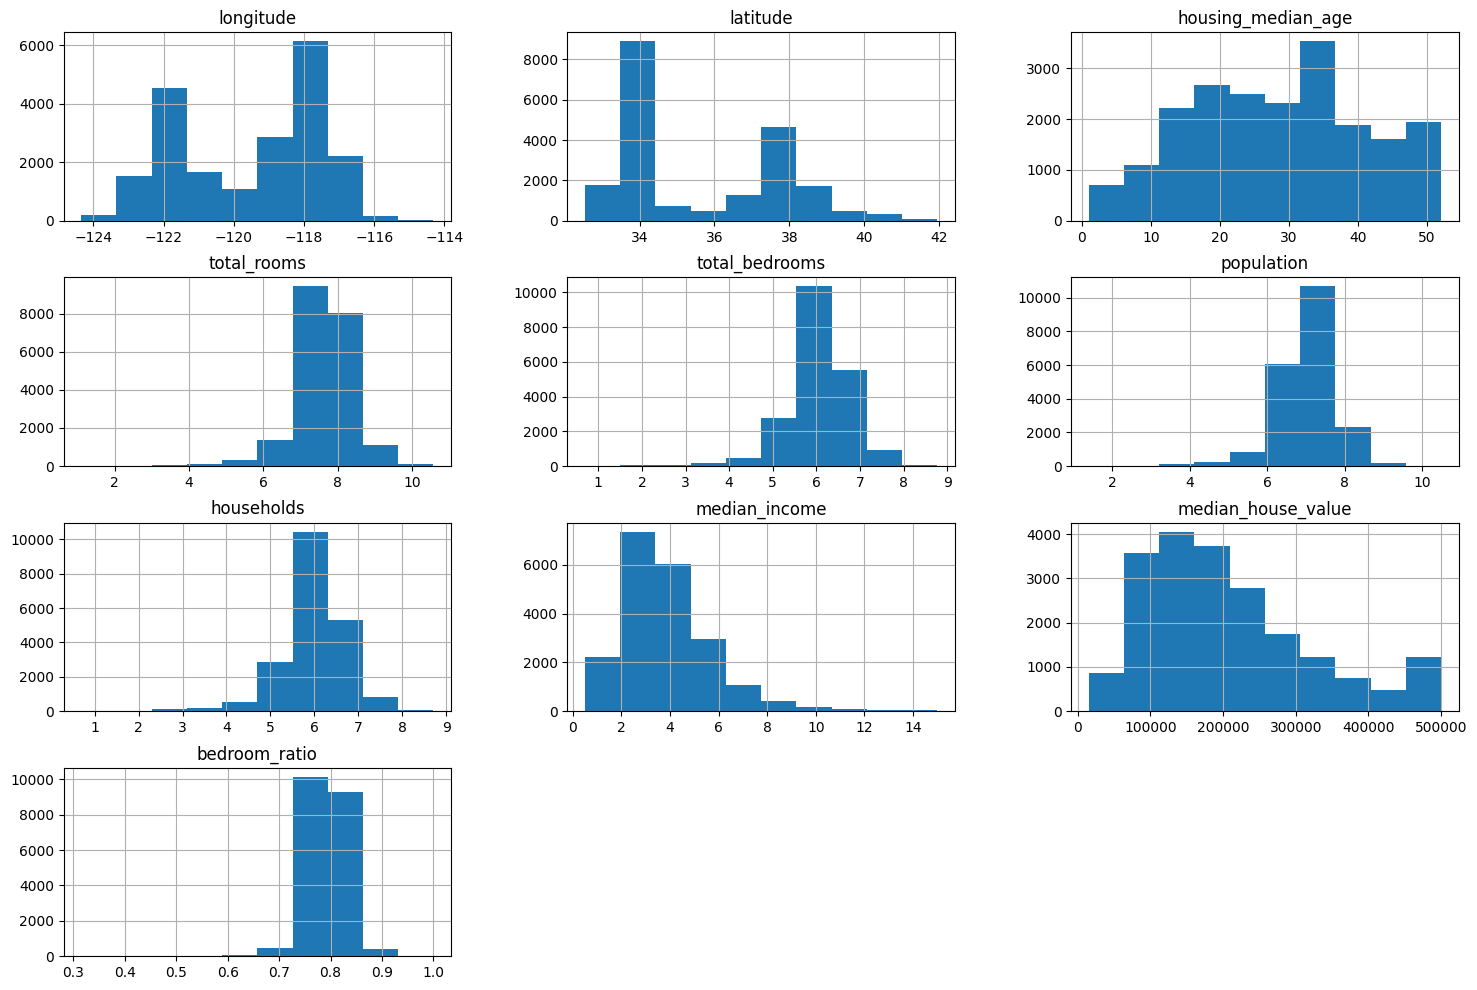

In [87]:
data.hist(figsize=(18,12))

In [89]:
scaler = StandardScaler()

X=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']

cols = X.columns

X = scaler.fit_transform(X)

In [90]:
X_train, X_test, y_train, y_test1 = train_test_split(X, y, test_size=0.10, random_state=101)
x_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [91]:
lr = LinearRegression()
lr.fit(x_train_scaled,y_train)

pred = lr.predict(X_test_scaled)
r2_score(y_test1,pred)


0.6683653858803569

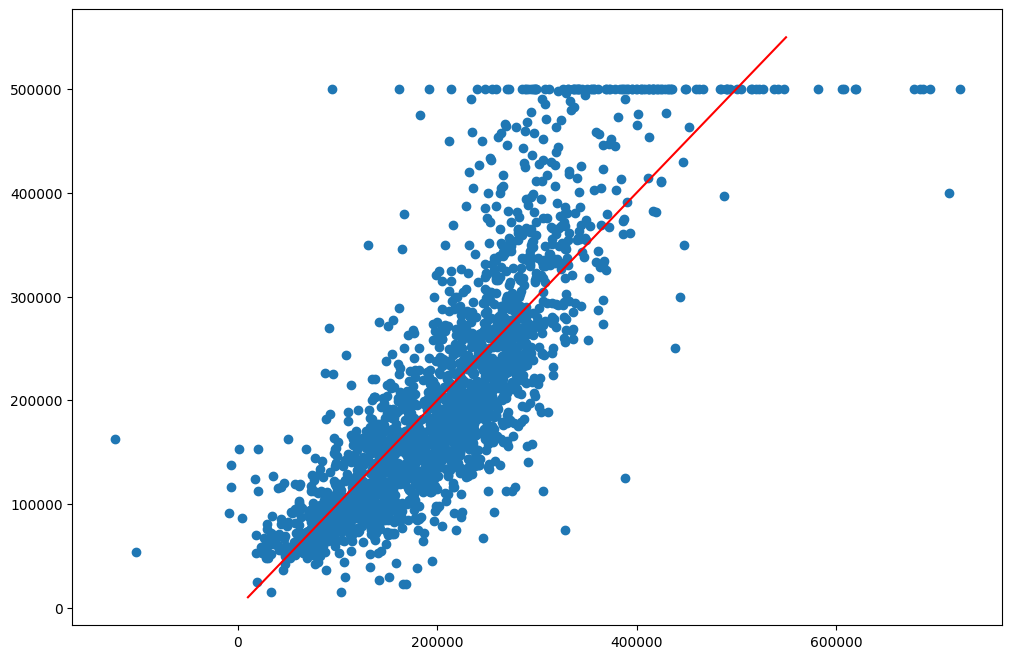

In [92]:

plt.figure(figsize=(12,8))
plt.scatter(pred, y_test1) 
plt.plot(range(10000,550000),range (10000,550000), c='red')

In [93]:
X_train, X_test, y_train, y_test2 = train_test_split(X, y, test_size=0.10, random_state=42)
x_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Create a Decision Tree regressor with default parameters
dt = DecisionTreeRegressor(random_state=42)

# Train the model
dt.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test_scaled)
score1 = r2_score(y_test2,y_pred)
# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test2, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")
print(score1)


Root Mean Squared Error: 66541.71234232427
0.67882394591037


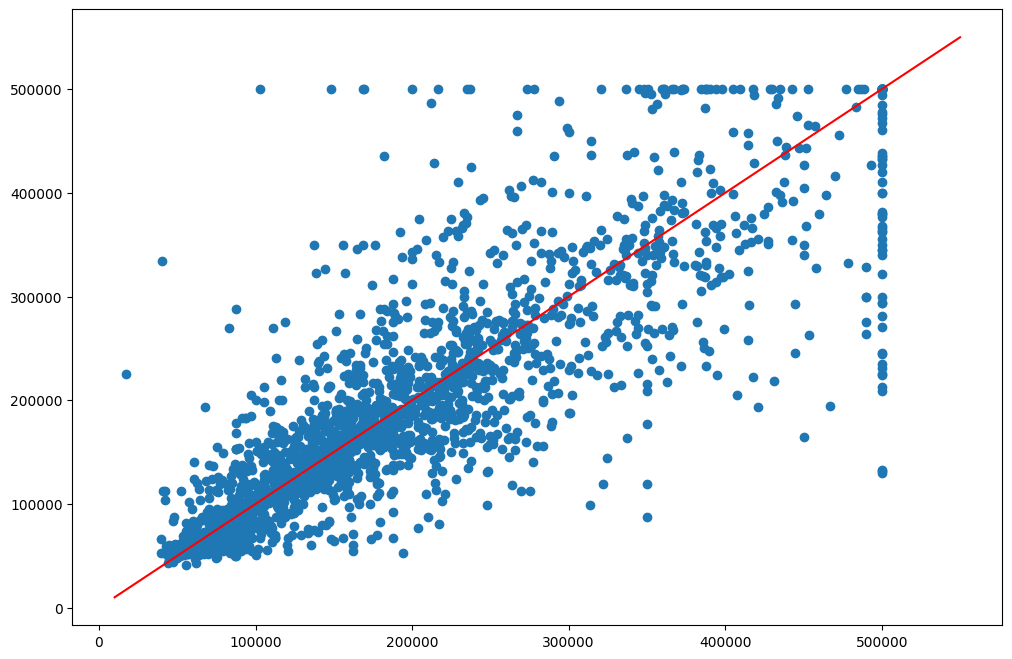

In [94]:

plt.figure(figsize=(12,8))
plt.scatter(y_pred, y_test2) 
plt.plot(range(10000,550000),range (10000,550000), c='red')

In [95]:


# Separate the features and target variable
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

x_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Create a Random Forest regressor with default parameters
rf = RandomForestRegressor(random_state=42)

# Train the model
rf.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred2 = rf.predict(X_test_scaled)
score2 = r2_score(y_test,y_pred2)
# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred2, squared=False)
print(score2)

0.8321327129335471


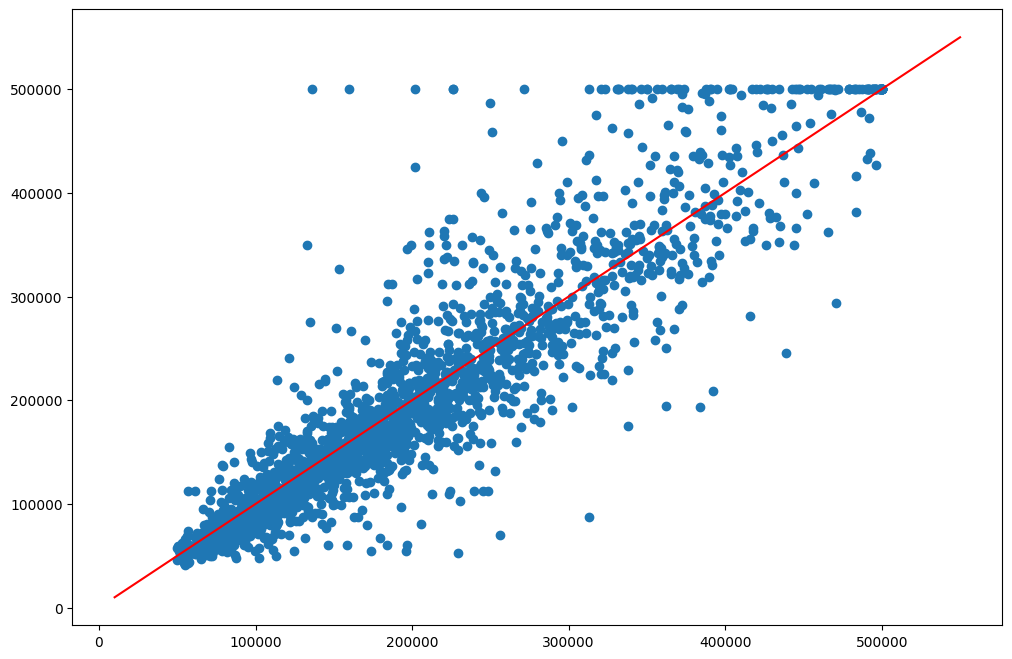

In [96]:

plt.figure(figsize=(12,8))
plt.scatter(y_pred2, y_test) 
plt.plot(range(10000,550000),range (10000,550000), c='red')